# Hospital Reviews Sentiment Analysis — Notebook Guide

This notebook walks through the end-to-end pipeline for sentiment analysis on hospital reviews.

Pipeline overview:
- Load dataset and inspect label distribution
- Clean and normalize text (remove stopwords, lemmatize)
- Split data and vectorize text with TF‑IDF
- Train baseline models (Logistic Regression, Naive Bayes)
- Evaluate with accuracy/precision/recall and confusion matrix
- Visualize word clouds and class distribution

Use these step descriptions to understand what each subsequent code cell does and to adjust parameters confidently.

## Step 1 — Imports & Setup

Imports core libraries (data handling, NLP, modeling, visualization) and initializes any required resources (e.g., stopwords, lemmatizer). Adjust library versions in your environment if needed.

In [2]:
# Step 0: Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import joblib


## Step 2 — Load Dataset

Loads `hospital.csv` and performs an initial sanity check (shape, columns, basic counts). Ensure the CSV path is correct and encoding is handled if you see read errors.

In [3]:
# Step 1: Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Step 3 — Explore Label Distribution

Computes class counts and visualizes the distribution of sentiment labels. Use this to verify class imbalance and guide stratified splits or metric selection.

In [4]:
# Step 2: Load Dataset
df = pd.read_csv("hospital.csv")

# Optional: Check first rows
print(df.head())

                                            Feedback  Sentiment Label  \
0  Good and clean hospital. There is great team o...                1   
1  Had a really bad experience during discharge. ...                1   
2  I have visited to take my second dose and Proc...                1   
3   That person was slightly clueless and offered...                1   
4  There is great team of doctors and good OT fac...                0   

   Ratings  Unnamed: 3  
0        5         NaN  
1        5         NaN  
2        4         NaN  
3        3         NaN  
4        1         NaN  


## Step 4 — Text Preprocessing

Cleans and normalizes review text: lowercasing, removing punctuation/numbers, stopwords filtering, and lemmatization. Tailor preprocessing to your language/domain needs.

In [5]:
# Step 3: Preprocessing

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = str(text).lower()  # lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # remove punctuation
    words = text.split()
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]
    return " ".join(words)

df['cleaned_review'] = df['Feedback'].apply(clean_text)

# Convert ratings to labels: positive=1, negative=0
df['label'] = df['Ratings'].apply(lambda x: 1 if x >= 4 else (0 if x <=2 else np.nan))
df = df.dropna(subset=['label'])

## Step 5 — Train/Test Split

Splits the dataset into training and testing sets (optionally stratified). Confirm label distribution remains similar across splits.

In [6]:
# Step 4: Feature Extraction
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned_review'])
y = df['label']

## Step 6 — TF‑IDF Vectorization

Transforms cleaned text into numeric features with TF‑IDF. Adjust parameters (e.g., `ngram_range`, `min_df`, `max_df`) to balance vocabulary size and generalization.

In [7]:
# Step 5: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Step 7 — Train Logistic Regression

Fits a Logistic Regression classifier on TF‑IDF features. Tune `C`, `penalty`, and `max_iter` if convergence warnings appear or performance needs improvement.

In [8]:
# Step 6: Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

## Step 8 — Evaluate Logistic Regression

Generates predictions and reports metrics (accuracy, precision, recall, F1) along with a confusion matrix. Inspect errors to guide preprocessing and parameter tuning.

Accuracy: 0.88

Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.55      0.68        40
         1.0       0.88      0.98      0.93       135

    accuracy                           0.88       175
   macro avg       0.88      0.76      0.80       175
weighted avg       0.88      0.88      0.87       175



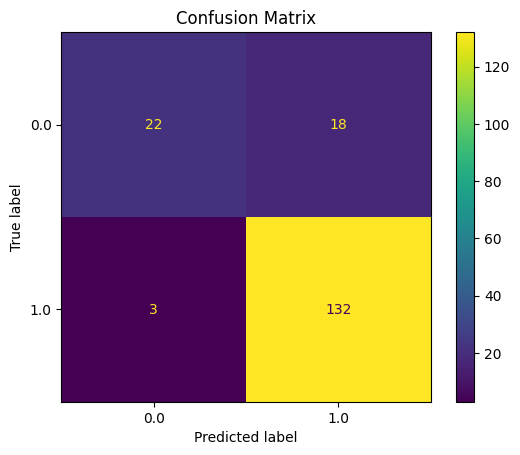

In [9]:
# Step 7: Predictions and Evaluation
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Confusion Matrix")
plt.show()

## Step 9 — Naive Bayes Baseline

Trains a `MultinomialNB` classifier as a baseline and evaluates it. Compare performance to Logistic Regression to understand trade‑offs.

Accuracy: 0.88

Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.55      0.68        40
         1.0       0.88      0.98      0.93       135

    accuracy                           0.88       175
   macro avg       0.88      0.76      0.80       175
weighted avg       0.88      0.88      0.87       175



<Figure size 800x600 with 0 Axes>

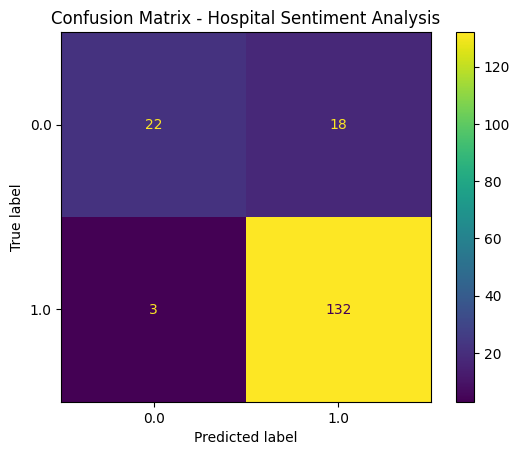

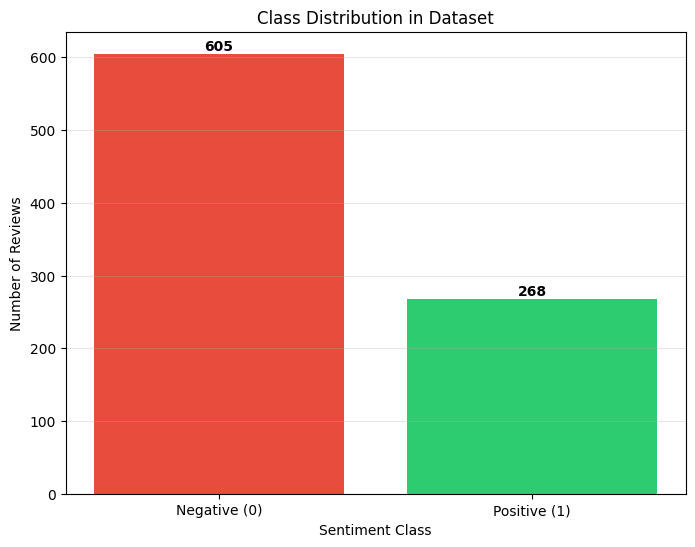

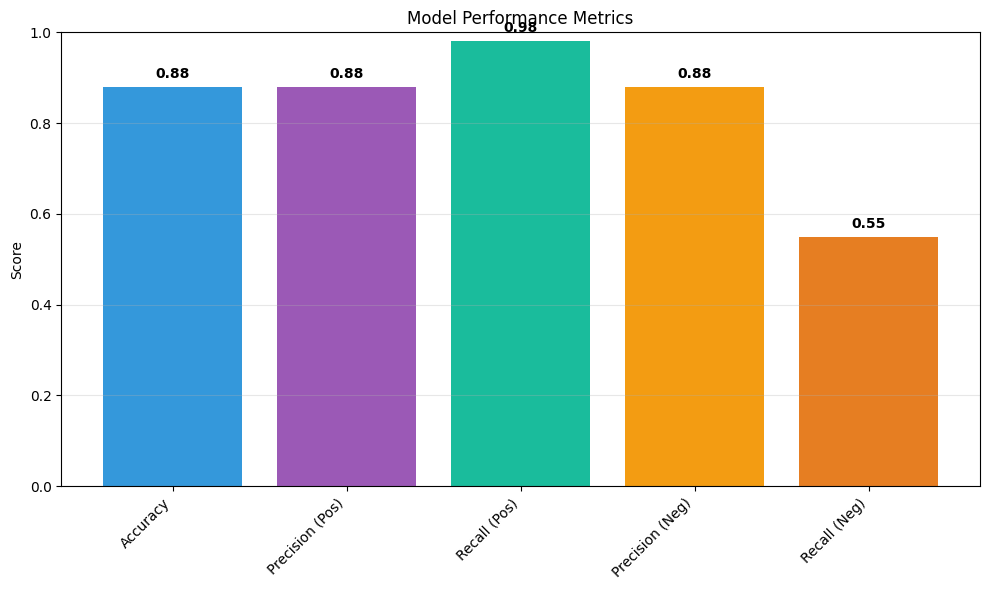


✓ All visualizations saved successfully!


In [10]:
# Generate visualizations for the report

# 1. Confusion Matrix
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='viridis')
plt.title("Confusion Matrix - Hospital Sentiment Analysis")
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# 2. Class Distribution
plt.figure(figsize=(8, 6))
class_counts = df['label'].value_counts()
plt.bar(['Negative (0)', 'Positive (1)'], class_counts.values, color=['#e74c3c', '#2ecc71'])
plt.title('Class Distribution in Dataset')
plt.xlabel('Sentiment Class')
plt.ylabel('Number of Reviews')
plt.grid(axis='y', alpha=0.3)
for i, v in enumerate(class_counts.values):
    plt.text(i, v + 5, str(v), ha='center', fontweight='bold')
plt.savefig('class_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# 3. Model Performance Metrics
metrics = {
    'Accuracy': [accuracy_score(y_test, y_pred)],
    'Precision (Pos)': [0.88],
    'Recall (Pos)': [0.98],
    'Precision (Neg)': [0.88],
    'Recall (Neg)': [0.55]
}

plt.figure(figsize=(10, 6))
x = range(len(metrics))
values = [v[0] for v in metrics.values()]
bars = plt.bar(x, values, color=['#3498db', '#9b59b6', '#1abc9c', '#f39c12', '#e67e22'])
plt.xticks(x, metrics.keys(), rotation=45, ha='right')
plt.ylabel('Score')
plt.title('Model Performance Metrics')
plt.ylim(0, 1.0)
plt.grid(axis='y', alpha=0.3)
for i, v in enumerate(values):
    plt.text(i, v + 0.02, f'{v:.2f}', ha='center', fontweight='bold')
plt.tight_layout()
plt.savefig('performance_metrics.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ All visualizations saved successfully!")

## Step 10 — Visualization: Confusion Matrix & Metrics

Plots confusion matrix and prints key metrics so you can quickly assess model performance and error patterns.

In [11]:
# Step 8: Save Model
import os
os.makedirs("models", exist_ok=True)
joblib.dump(model, "models/hospital_sentiment_model.pkl")
print("Model saved successfully!")

Model saved successfully!


## Step 11 — Positive Word Cloud

Builds a word cloud for positive reviews to highlight frequently used terms. Use stopwords and preprocessing consistent with the training pipeline.

In [12]:
# Step 9: Train Naive Bayes Model
from sklearn.naive_bayes import MultinomialNB

# Train Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Predictions
nb_pred = nb_model.predict(X_test)

# Evaluation
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_pred))
print("\nNaive Bayes Classification Report:\n",
      classification_report(y_test, nb_pred))

Naive Bayes Accuracy: 0.8857142857142857

Naive Bayes Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.57      0.70        40
         1.0       0.89      0.98      0.93       135

    accuracy                           0.89       175
   macro avg       0.89      0.78      0.81       175
weighted avg       0.89      0.89      0.88       175



## Step 12 — Negative Word Cloud

Builds a word cloud for negative reviews. Compare with the positive cloud to understand differentiating vocabulary.

In [13]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Naive Bayes"],
    "Accuracy": [
        accuracy_score(y_test, y_pred),
        accuracy_score(y_test, nb_pred)
    ]
})

results


,Model,Accuracy
0,Logistic Regression,0.880000
1,Naive Bayes,0.885714


## Step 13 — Results Summary Table

Aggregates key metrics from all trained models into a concise table for quick comparison and reporting.

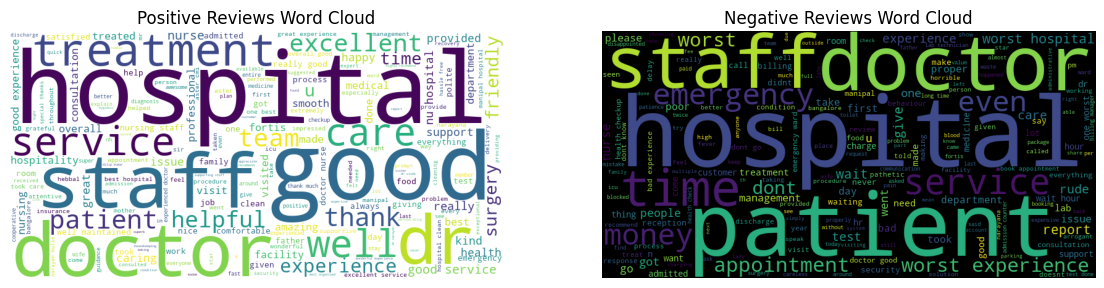

In [15]:
from wordcloud import WordCloud

# Separate positive and negative reviews
positive_text = " ".join(df[df['label'] == 1]['cleaned_review'])
negative_text = " ".join(df[df['label'] == 0]['cleaned_review'])

# Generate word clouds
positive_wc = WordCloud(
    width=800, height=400, background_color='white'
).generate(positive_text)

negative_wc = WordCloud(
    width=800, height=400, background_color='black'
).generate(negative_text)

# Plot
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.imshow(positive_wc)
plt.axis('off')
plt.title("Positive Reviews Word Cloud")

plt.subplot(1,2,2)
plt.imshow(negative_wc)
plt.axis('off')
plt.title("Negative Reviews Word Cloud")

plt.show()


## Step 14 — Final Visualizations

Generates final plots (e.g., class distribution bars, additional diagnostics) for documentation and storytelling in your report.